# Feature Importance

For feature importance, we turn to the SHAP Python library, which calculates the shapley values automatically. This library, however, is only compatable with TensorFlow. We thus recreate the model from Milestone 3 which utilizes Pytorch in TensorFlow. 

In [48]:
import tensorflow as tf
from keras.models import Model
from tensorflow import keras
from keras import layers
import shap
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.layers import BatchNormalization

## Loading the Data

In [49]:
# def getfile(location_pair,**kwargs): #tries to get local version and then defaults to google drive version
#     (loc,gdrive)=location_pair
#     try:
#         out=pd.read_csv(loc,**kwargs)
#     except FileNotFoundError:
#         print("local file not found; accessing Google Drive")
#         loc = 'https://drive.google.com/uc?export=download&id='+gdrive.split('/')[-2]
#         out= pd.read_csv(loc,**kwargs)
#     return out

# import urllib
# def getLargeFile(location_pair,**kwargs): #tries to get local version and then defaults to google drive version
#     (loc,gdrive)=location_pair
#     try:
#         out=pd.read_csv(loc,**kwargs)
#     except FileNotFoundError:
#         print("local file not found; accessing Google Drive")
#         url = gdrive
#         urllib.request.urlretrieve(gdrive, loc)
#         out= pd.read_csv(loc,**kwargs)
#     return out

# fname = ("Crime_Data_from_2020_to_Present.csv", 
#          "https://drive.google.com/u/0/uc?id=1WwLkX_BADtPY83rFQ4CQ5Lbf6UcI055A&export=download&confirm=t&uuid=4e0aae58-2f5b-4420-941f-8f2f49ae0cb8&at=ALAFpqzX_FrSz-hUtqhaXe2ui7h6:1667673013562")
# df = getLargeFile(fname)
# df.head()

## Importing the Pre-Processed Data

This directly uses the pre-processed data from Milestone 3

In [50]:
months = ['M' + str(i) for i in range(1,13)]
genders = ['F', 'H', 'M', 'X']

In [51]:
featureColumns = ['LAT', 'LONG', 'Vict Age', 'Y2020', 'Y2021', 'Y2022'] + months + genders

In [52]:
featuresAll = pd.read_csv('trainingData.csv', index_col=[0])
featuresAll.columns = featureColumns
featuresAll.head()

,LAT,LONG,Vict Age,Y2020,Y2021,Y2022,M1,M2,M3,M4,...,M7,M8,M9,M10,M11,M12,F,H,M,X
0,-0.329331,1.423877,0.040968,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.329331,1.329810,-0.962187,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.021398,-0.645597,2.611553,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.109081,-0.833731,2.674250,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.109081,0.671341,-0.335215,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [53]:
labels = pd.read_csv('trainingDataOriginal.csv', index_col = [0])['Count']

In [54]:
test_size = 0.2
validation_size = 0.2

In [55]:
x_train_val, x_test, y_train_val, y_test = train_test_split(
    featuresAll, labels, test_size=test_size)

x_train, x_val, y_train, y_val = train_test_split(
    x_train_val, y_train_val, test_size=validation_size / (1-test_size))

## Now defining tf model

We have seen that the best model presented in Milestone 3 is the model which utilizes:
* 64 neurons in the first hidden layer
* 32 neurons in the second hidden layer
* RMSprop as the optimizer
* A batch size of 256
* No dropout

In [56]:
model = keras.Sequential()
model.add(layers.InputLayer(input_shape = x_train.shape[1]))
model.add(layers.Dense(64, activation = 'relu'))
model.add(BatchNormalization())
model.add(layers.Dense(32, activation = 'relu'))
model.add(BatchNormalization())
model.add(layers.Dense(1, activation = 'linear'))
model.compile(loss = keras.losses.MeanSquaredError(), optimizer='RMSProp', metrics=['mse'])

In [57]:
history = model.fit(x_train, y_train, epochs = 100, verbose = True)
ypred = model.predict(x_test)
print(mean_squared_error(ypred, y_test))

Epoch 1/100
6977/6977 [==============================] - 21s 3ms/step - loss: 0.4899 - mse: 0.4899
Epoch 2/100
6977/6977 [==============================] - 18s 3ms/step - loss: 0.4620 - mse: 0.4620
Epoch 3/100
6977/6977 [==============================] - 19s 3ms/step - loss: 0.4569 - mse: 0.4569
Epoch 4/100
6977/6977 [==============================] - 19s 3ms/step - loss: 0.4545 - mse: 0.4545
Epoch 5/100
6977/6977 [==============================] - 18s 3ms/step - loss: 0.4536 - mse: 0.4536
Epoch 6/100
6977/6977 [==============================] - 18s 3ms/step - loss: 0.4526 - mse: 0.4526
Epoch 7/100
6977/6977 [==============================] - 18s 3ms/step - loss: 0.4526 - mse: 0.4526
Epoch 8/100
6977/6977 [==============================] - 18s 3ms/step - loss: 0.4514 - mse: 0.4514
Epoch 9/100
6977/6977 [==============================] - 18s 3ms/step - loss: 0.4516 - mse: 0.4516
Epoch 10/100
6977/6977 [==============================] - 19s 3ms/step - loss: 0.4523 - mse: 0.4523
Epoch 11/

We are able to obtain approxiamtely the same metric as the pytorch implementation of approximately 0.3-0.4 on test data

## Feature Importance

In [72]:
from shap.explainers._deep.deep_tf import passthrough
shap.explainers._deep.deep_tf.op_handlers['AddV2'] = passthrough

In [75]:
explainer = shap.DeepExplainer(model,x_train.values[0:5000])
shap_values = explainer.shap_values(x_train.values[0:5000])

In [77]:
SMALL_SIZE = 16
MEDIUM_SIZE = SMALL_SIZE + 2
BIGGER_SIZE = MEDIUM_SIZE + 2
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['text.usetex'] = True
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.


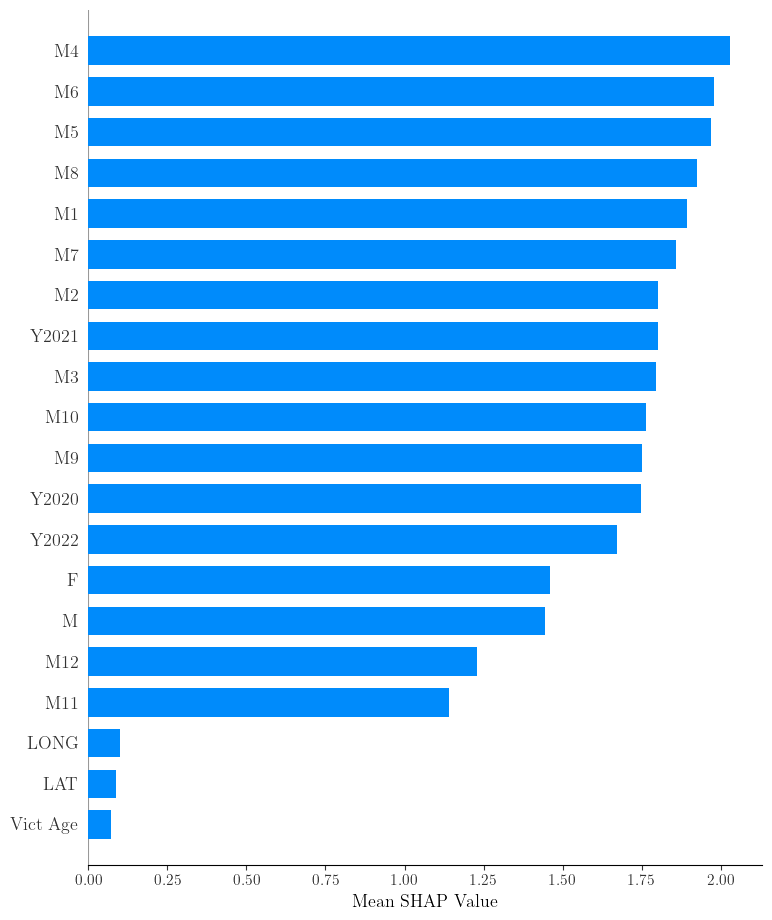

In [82]:
shap.summary_plot(shap_values[0], plot_type = "bar", feature_names = x_train.columns, show = False)
plt.xlabel('Mean SHAP Value')
plt.savefig('Feature Importance.png', dpi = 300, bbox_inches = 'tight')
plt.show()
plt.close()

Interestingly enough, the features which have the highest importance are the months in which the crimes occur. We see that the victim age and the longitudes and latitudes also do not have as big of an impact on the total number of crimes occuring. Further, we see here that in our machine learning model, there is not a significant seasonal correlation between the counts of crime. Nevertheless, we have shown the explainability in the predictions within our model.  